# Data Manipulation

## Manipulating data from a dataset about police data

### Import Libs

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

### Define limits

In [1]:
#Uncomment to view full tables
#pd.set_option("display.max_rows", None)
#pd.set_option("display.max_columns", None)

### 1 - Load data of file

In [4]:
data = pd.read_csv('adjusted_dataset.csv', sep = ';')

### 2 - Show data loaded

In [5]:
print(data) #Show data resume

        id                name        date   manner_of_death       armed  \
0        3          Tim Elliot  02/01/2015              shot         gun   
1        4    Lewis Lee Lembke  02/01/2015              shot         gun   
2        5  John Paul Quintero  03/01/2015  shot and Tasered     unarmed   
3        8     Matthew Hoffman  04/01/2015              shot  toy weapon   
4        9   Michael Rodriguez  04/01/2015              shot    nail gun   
...    ...                 ...         ...               ...         ...   
4890  5916     Rayshard Brooks  12/06/2020              shot       Taser   
4891  5925      Caine Van Pelt  12/06/2020              shot         gun   
4892  5918        Hannah Fizer  13/06/2020              shot     unarmed   
4893  5921      William Slyter  13/06/2020              shot         gun   
4894  5924      Nicholas Hirsh  15/06/2020              shot         gun   

       age gender      race           city state  signs_of_mental_illness  \
0     53.0

#### Columns

In [6]:
data_type = pd.DataFrame(data.dtypes, columns = ['Type'])
data_type.columns.name = 'Title'

In [7]:
print(data_type) #Columns and Types of table

Title                      Type
id                        int64
name                     object
date                     object
manner_of_death          object
armed                    object
age                      object
gender                   object
race                     object
city                     object
state                    object
signs_of_mental_illness    bool
threat_level             object
flee                     object
body_camera                bool
arms_category            object


## 3 - List of the top 10 ways people were killed and the number of men and women victims of each of these crimes.

In [8]:
# Grouping the data by "manner_of_death" and "gender", and counting the number of occurrences in each group
score = data.groupby(["manner_of_death", "gender"])["id"].count()

In [9]:
# Sorting the count down and displaying the top 10 ways people were killed
top_10 = score.sort_values(ascending=False).head(10)
print("Top 10 ways people were killed: ")
print(top_10)

Top 10 ways people were killed: 
manner_of_death   gender
shot              M         4431
shot and Tasered  M          242
shot              F          216
shot and Tasered  F            6
Name: id, dtype: int64


In [10]:
for i, (cause, gender) in enumerate(top_10.index):
    n_victims = top_10.iloc[i]
    print(f"{cause} ({gender}): {n_victims}")

shot (M): 4431
shot and Tasered (M): 242
shot (F): 216
shot and Tasered (F): 6


## 4 - The average age of people who were murdered by gun of fire in the state of Florida

In [11]:
# Filtering the DataFrame to only include lines corresponding to Florida and gun
data_florida = data.loc[(data["state"] == "FL") & (data["armed"].str.contains("gun", case=False))]

In [12]:
# Removing non-numeric characters from "age" column and converting to float
data_florida.loc[:, "age"] = data_florida["age"].replace("[^0-9\.]", "", regex=True)
data_florida.loc[:, "age"] = pd.to_numeric(data_florida["age"], errors="coerce")

/tmp/ipykernel_17946/3120731451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_florida.loc[:, "age"] = data_florida["age"].replace("[^0-9\.]", "", regex=True)
/tmp/ipykernel_17946/3120731451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_florida.loc[:, "age"] = pd.to_numeric(data_florida["age"], errors="coerce")


In [13]:
# Result averge
averge_age = data_florida["age"].mean()
averge_age

40.037837837837834

In [14]:
round(averge_age)
print(f"The average age of people who have been murdered by a firearm in Florida is {round(averge_age)} years.")

The average age of people who have been murdered by a firearm in Florida is 40 years.


## 5 - Percentage of men and women who were killed among people who were of Asian origin

In [15]:
# Filter only rows where column "race" equals "Asian"
data_asian = data[data["race"] == "Asian"]

In [16]:
# Calculate the total number of males and females in this subset of the dataframe
total_males = len(data_asian[data_asian["gender"] == "M"])
total_females = len(data_asian[data_asian["gender"] == "F"])

In [17]:
#Percentual
percent_males = total_males / len(data_asian) * 100
percent_females = total_females / len(data_asian) * 100

In [18]:
print(f"Percentage of men killed among people of Asian origin: {percent_males:.2f}%")
print(f"Percentage of women killed among people of Asian origin: {percent_females:.2f}%")

Percentage of men killed among people of Asian origin: 95.70%
Percentage of women killed among people of Asian origin: 4.30%


## 6 - The number of deaths by race

In [19]:
race_counts = data["race"].value_counts()
print(race_counts)

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64


## 7 - Given the name of two victims show how much of the other data are similar between the deaths. Check whether the person's name was exists in the list or not.

In [20]:
#Show names
print(data["name"])

0               Tim Elliot
1         Lewis Lee Lembke
2       John Paul Quintero
3          Matthew Hoffman
4        Michael Rodriguez
               ...        
4890       Rayshard Brooks
4891        Caine Van Pelt
4892          Hannah Fizer
4893        William Slyter
4894        Nicholas Hirsh
Name: name, Length: 4895, dtype: object


In [2]:
# Take values
victims_name1 = input("Type the first victim's name: ")
victims_name2 = input("Type the second victim's name: ")

Type the first victim's name: Tim Elliot
Type the second victim's name: Lewis Lee Lembke


In [5]:
# Check if both names exist in the victims list
if (victims_name1 not in data['name'].values) or (victims_name2 not in data['name'].values):
    print("One or both of the names do not exist on the list of victims.")
else:
    # Filter the DataFrame to only get the rows that match the two victims
    data_victims = data.loc[data['name'].isin([victims_name1, victims_name2])]

In [6]:
# Compare the information on the lines of the two victims and print the ones that are similar
print("The following information is similar in the deaths of", victims_name1, "e", victims_name2, ":")
for collumn in data_victims.columns:
    if collumn != 'name':
        collumn_values = data_victims[collumn].unique()
        if len(collumn_values) == 1:
            print(collumn + ": " + str(collumn_values[0]))

The following information is similar in the deaths of Tim Elliot e Lewis Lee Lembke :
date: 02/01/2015
manner_of_death: shot
armed: gun
gender: M
threat_level: attack
flee: Not fleeing
body_camera: False
arms_category: Guns


## 8 - Month of the year has the most deaths

In [7]:
# Count the number of occurrences of each month/year
count_by_date = data["date"].value_counts()

In [8]:
# Find the maximum value index (month/year with more deaths)
max_date = count_by_date.idxmax()

In [9]:
print(f"The month and year with the most deaths was: {max_date}")

The month and year with the most deaths was: 29/06/2018


## 9 - Rate of murders that were recorded over time. Inform the year and what percentage of murders were recorded in that year.

In [10]:
# Converting the date column to datetime type and creating a new column with the year
data.loc[:, "age"]["date"] = pd.to_datetime(data["date"])
data["year"] = data["date"].dt.year

/home/borges/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/01/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/borges/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/01/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/borges/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/01/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/borges/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16/01/2015' in DD/MM/YYYY 

In [11]:
# Counting the number of deaths recorded each year
total_of_deaths_by_year = data.groupby("year")["body_camera"].sum()
total_of_deaths_by_year = total_of_deaths_by_year.rename("total_of_deaths")

In [12]:
# Counting the total number of deaths in each year
total_number_of_deaths_by_year = data.groupby("year")["body_camera"].count()
total_number_of_deaths_by_year = total_number_of_deaths_by_year.rename("total_number_of_deaths")

In [13]:
# Joining the previous two dataframes
murder_rate_per_year = pd.concat([total_of_deaths_by_year, total_number_of_deaths_by_year], axis=1)

In [14]:
# Calculating the recorded murder rate each year
murder_rate_per_year["rate"] = murder_rate_per_year["total_of_deaths"] / murder_rate_per_year["total_number_of_deaths"]

In [15]:
murder_rate_per_year

,total_of_deaths,total_number_of_deaths,rate
year,,,
2015,74,965,0.076684
2016,137,904,0.151549
2017,99,906,0.109272
2018,109,888,0.122748
2019,121,858,0.141026
2020,38,374,0.101604


In [16]:
# Find the year with the bigger rate of recorded murders
year_more_recordings = murder_rate_per_year["rate"].idxmax()
rate_plus_recordings = murder_rate_per_year["rate"].max()

In [17]:
print(f"The year with the highest recorded murder rate was {year_more_recordings}, with a rate of {rate_plus_recordings:.2%} of recorded deaths.")

The year with the highest recorded murder rate was 2016, with a rate of 15.15% of recorded deaths.


## 10 - The most used weapon type each quarter.

In [18]:
# Group data by quarter
data.groupby(pd.Grouper(key='date', freq='Q'))['arms_category'].apply(lambda x: x.value_counts().index[0])

date
2015-03-31    Guns
2015-06-30    Guns
2015-09-30    Guns
2015-12-31    Guns
2016-03-31    Guns
2016-06-30    Guns
2016-09-30    Guns
2016-12-31    Guns
2017-03-31    Guns
2017-06-30    Guns
2017-09-30    Guns
2017-12-31    Guns
2018-03-31    Guns
2018-06-30    Guns
2018-09-30    Guns
2018-12-31    Guns
2019-03-31    Guns
2019-06-30    Guns
2019-09-30    Guns
2019-12-31    Guns
2020-03-31    Guns
2020-06-30    Guns
2020-09-30    Guns
2020-12-31    Guns
Freq: Q-DEC, Name: arms_category, dtype: object

## 11 - Percentage of white victims who fled.

In [19]:
white_victims = data[data["race"] == "White"]
white_victims_fled = white_victims[white_victims["flee"] != "Not fleeing"]
percentage_white_victims_fled = len(white_victims_fled) / len(white_victims) * 100
print(f"The percentage of white victims who fled is{percentage_white_victims_fled:.2f}%")

The percentage of white victims who fled is33.08%


## 12 - Display total casualties by state (ascending order)

In [20]:
victims_by_state = data.groupby('state')['id'].count()
victims_by_state = victims_by_state.sort_values()
print(victims_by_state)

state
RI      4
VT      8
DE     10
ND     11
NH     12
WY     13
DC     13
SD     14
CT     20
ME     21
NE     24
MT     29
HI     29
IA     31
MA     33
AK     36
ID     37
WV     46
KS     49
UT     58
NJ     60
MN     60
MS     61
MI     71
AR     73
OR     76
MD     77
SC     80
NV     85
KY     87
WI     88
NY     90
IN     91
VA     92
NM     93
PA     95
AL     95
IL     99
LA    102
MO    124
TN    125
WA    126
OH    146
NC    148
OK    151
GA    161
CO    168
AZ    222
FL    324
TX    426
CA    701
Name: id, dtype: int64


## 13 - Display total casualties by year (ascending order).

In [22]:
data['date'] = pd.to_datetime(data['date'])

In [23]:
# Create a new collumn "year"
data['year'] = data['date'].dt.year

In [25]:
# Group by year and count occurrence numbers
total_victims_per_year = data.groupby('year')['id'].count()

In [26]:
print(total_victims_per_year)

year
2015    965
2016    904
2017    906
2018    888
2019    858
2020    374
Name: id, dtype: int64


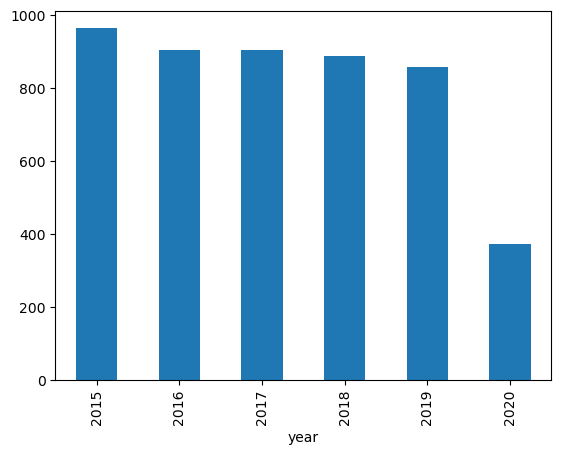

In [28]:
#show in the graph
total_victims_per_year.plot(kind='bar')
plt.show()